In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [3]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train,1))
Y_test = np.zeros((n_test,1))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1]).reshape((n_train,1))

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1]).reshape((n_test,1))

print(X_train.shape)
print(X_test.shape)

(399, 190)
(100, 190)


In [4]:
""" jvking normalization """
X_train = X_train - np.mean(X_train, axis = 0)
X_test = X_test - np.mean(X_test, axis = 0)
for _ in range(d):
    if np.var(X_train[:]) != 0:
        X_train[:] = X_train[:] / np.std(X_train[:])
    if np.var(X_test[:]) != 0:
        X_test[:] = X_test[:] / np.std(X_test[:])

In [13]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 10
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 10 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.0001 # 0.00000005
EP = 1000
samp = 10000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))


In [14]:

#Training the neural network
def g(A):
    return (np.tanh(A))

def gd(A):
    return (1-np.square(np.tanh(A)))

for ep in range(EP):
    #print(ep)

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        """ jvking gradient check """
        # for ii in range(w1.shape[0]):
        #     for jj in range(w1.shape[1]):
        #         w1[ii, jj] += 1e-7
        #         hh = g(X_train[st:ed].dot(w1))
        #         yyhh = h.dot(w2)

        w2 += lr*d2
        w1 += lr*d1


0 0.177555766122 0.344836902179
1 0.177555495666 0.34483627741
2 0.177555262984 0.344835740879
3 0.177554804625 0.344834691217
4 0.177552902462 0.344830429705
5 0.176826897379 0.343330525796
6 0.122309765629 0.235303231463
7 0.0885339501772 0.176750563279
8 0.085703570639 0.173088794939
9 0.0824230387395 0.166992605102
10 0.0797908578323 0.161484887579
11 0.0767791256361 0.155772080635
12 0.0742440944689 0.151025851303
13 0.0720467437207 0.146534203487
14 0.0702866997392 0.142686241064
15 0.0686314865163 0.13927266621
16 0.0675495015399 0.138653237749
17 0.0672741530762 0.136479642519
18 0.0652863894548 0.132560912648
19 0.0639940130997 0.13118017712
20 0.0630673613251 0.12857771802
21 0.0623272851751 0.127139804412
22 0.0618606381504 0.126447002265
23 0.0612869473999 0.126256551681
24 0.0622598618468 0.129671558423
25 0.0601640658386 0.12336344573
26 0.0599867796305 0.123951774927
27 0.05946725159 0.12255666009
28 0.0597446042644 0.121396929535
29 0.0598088626231 0.121353012046
30 0.0

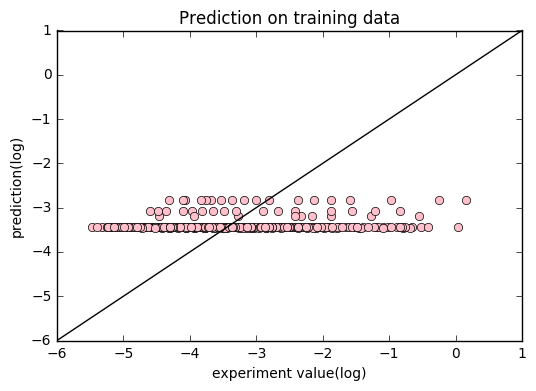

In [9]:
yh = g(X_train.dot(w1)).dot(w2)
plt.plot(Y_train,yh,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

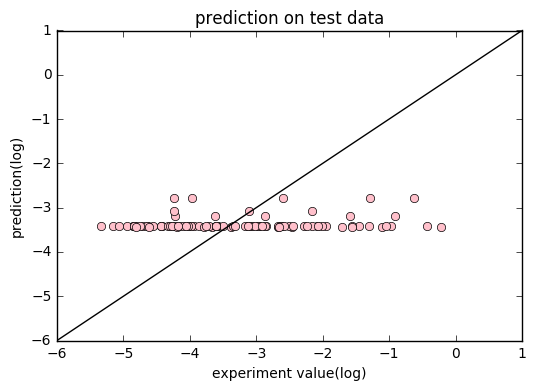

In [10]:
yh = g(X_test.dot(w1)).dot(w2)
plt.plot(Y_test,yh,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('prediction on test data')
plt.show()